In [276]:
#Modules necesary for the following section
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image
from scipy.spatial import distance

%matplotlib inline
import matplotlib
import numpy as np

import skimage 
from skimage import io, filters
from skimage.filters import gaussian

import glob
import os

In [277]:
# Obtain and print the path to the images. Print the number of images in total.
ext = "tif"
path = str(os.getcwd())
path = path + "/Images/All/*." + ext
print(path)

archivos = glob.glob(path)
arch = len(archivos)
print("Files:", arch)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/*.tif
Files: 2


In [278]:
# Filename: the path to a specified image which is going to be analyzed. 
# Arname: the name of the image to be analyzed
#for i in archivos:
#    print(i)

filename = archivos[1] #The 44 value can change to select other pictures. To use all see bottom of the code
arname = filename[177:] #Mod this to have cut to the name of the file only

print(filename)
print(arname)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/cropGFP.tif
cropGFP.tif


101.0
(250, 250)


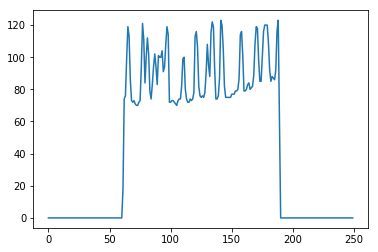

In [304]:
# (1) Import the file to be analyzed!
img_file = Image.open(filename)
img = img_file.load()

imagefile = plt.imread(filename).astype(np.float32)
#plt.imshow(imagefile, aspect='equal')
g_image = imagefile#[50:800, 100:800] #100:800, 370:1070
ng_image = (g_image-g_image[g_image > 0].min())/(g_image.max()-g_image[g_image > 0].min())


print(g_image[g_image > 100].min())
ng_image[ng_image < 0] = 0

print(ng_image.shape)
#plt.imshow(g_image)
#plt.colorbar()
plt.plot(g_image[100,:])

In [285]:
# (2) Get image width & height in pixels
[xs, ys] = ng_image.shape[:2]
print([xs, ys])
print("Total image size: ", xs*ys)

# Obtain the number of pixels in a certain distance
interval = 10
R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval)
nR = len(R)
print("Radius:", nR, " Interval:", interval)
dR = 0
count = np.zeros((nP, nR))
corr = np.zeros((nR, 1))

threshold = 0.8 #Must be a value from 0 to 1

indx = np.where(ng_image > threshold) #indx is 2 arrays with x and y points where the condition is met
nx = len(indx[0]) #nx == ny
print("Number of pixels found:", nx)

y, x = np.meshgrid(np.arange(xs), np.arange(ys))
cx, cy = indx

for c in range(0, nx):
    x0 = cx[c]
    y0 = cy[c]
    
    int0 = ng_image[x0, y0]
    
    r = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    if c%30 == 0:
        print(c, c/nx*100, "%")
    
    if c == nx - 1:
        print("100 %")
    
    for nr in range(nR):
        rad = R[nr]
        ridx = np.where((r >= rad)*(r < rad+interval)*(g_image > 0))
        CR = np.mean(ng_image[ridx]*int0) # multiply narray with the intensity of the pixel
        corr[nr] += CR

[250, 250]
Total image size:  62500
Radius: 36  Interval: 10
Number of pixels found: 2917
0 0.0 %
10 0.34281796366129585 %


/Users/jorgeriverosvergara/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jorgeriverosvergara/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


20 0.6856359273225917 %
30 1.0284538909838876 %
40 1.3712718546451834 %
50 1.7140898183064794 %
60 2.0569077819677752 %
70 2.399725745629071 %
80 2.742543709290367 %
90 3.0853616729516626 %
100 3.428179636612959 %
110 3.7709976002742542 %
120 4.1138155639355505 %
130 4.456633527596846 %
140 4.799451491258142 %
150 5.142269454919438 %
160 5.485087418580734 %
170 5.8279053822420295 %
180 6.170723345903325 %
190 6.513541309564622 %
200 6.856359273225918 %
210 7.199177236887213 %
220 7.5419952005485085 %
230 7.884813164209804 %
240 8.227631127871101 %
250 8.570449091532396 %
260 8.913267055193693 %
270 9.25608501885499 %
280 9.598902982516284 %
290 9.941720946177579 %
300 10.284538909838876 %
310 10.62735687350017 %
320 10.970174837161467 %
330 11.312992800822762 %
340 11.655810764484059 %
350 11.998628728145356 %
360 12.34144669180665 %
370 12.684264655467947 %
380 13.027082619129244 %
390 13.369900582790539 %
400 13.712718546451836 %
410 14.055536510113129 %
420 14.398354473774425 %
430 

In [215]:
# C(r) is proportional to r**(-a), where "a" gives the fractal dimention by substracting the space dimention
fitt = []
alpha = 0.15
A = 3500

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha) 
    fitt.append(corad)

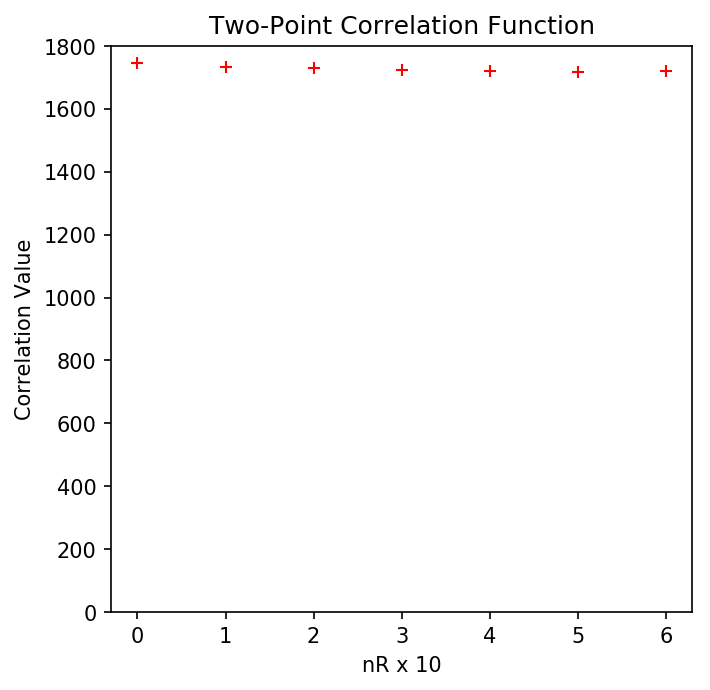

In [288]:
# Plot the correlation list and the fit
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
#plt.plot(fitt)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.ylim(ymin = 0, ymax = 1800)
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

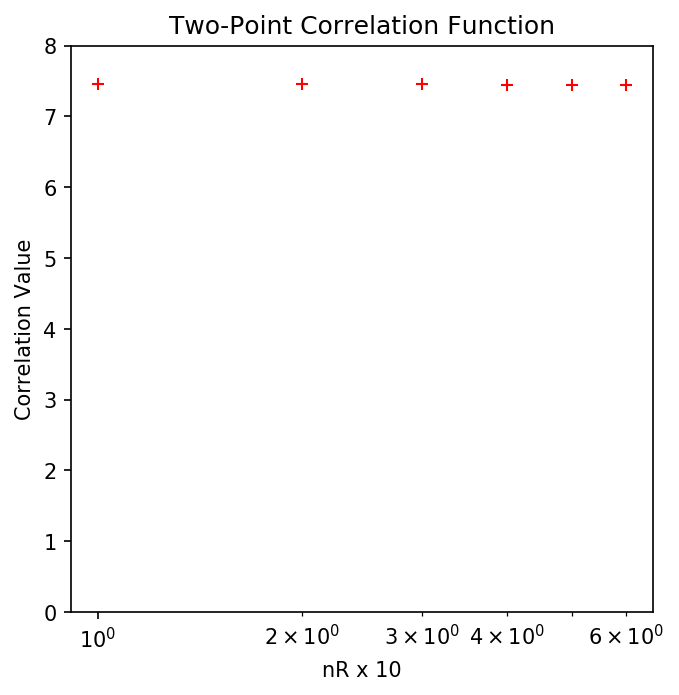

In [293]:
# Plot the same lists in logaritmic scale
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(np.log(corr), "r+")
#plt.plot(fitt)
#plt.yscale("log")
plt.xscale("log")
plt.ylim(ymin = 0, ymax = 8)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_loglog_%s.png' %arname)
plt.show()

In [211]:
D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
print("The fractal dimension is:", Df)

The fractal dimension is: 1.85


Use this portion of the code to analyze all of the images in the provided path.

It may take a long time to finish.

In [ ]:
lcorr = []

for nimage in range(0, len(archivos)):
    filename = archivos[nimage] #The 44 value can change to select other pictures. To use all see bottom of the code
    arname = filename[177:] #Mod this to have cut to the name of the file only

    print(arname)
    
    # (1) Import the file to be analyzed!
    img_file = Image.open(filename)
    img = img_file.load()

    # (2) Get image width & height in pixels
    [xs, ys] = img_file.size
    print("Total image size: ", xs*ys)
    
    pixels = [] #Array positions [x,y] for each pixel
    all_pixels = [] #Same with [x, y, n], which n = 1 for a lighted pixel and n = 0 for a dark one.
    array_img = [] #Array with 1 or 0 which resembles the image taken

    # (3) Examine each pixel in the image file
    for x in range(0, xs):
        line = []
        for y in range(0, ys):
            # (4)  Get the RGB color of the pixel
            [r, g, b, k] = img[x, y]

            # (5)  Normalize pixel color values
            r /= 255.0
            g /= 255.0
            b /= 255.0
    
            if r != 0 or g != 0 or b !=0:
                pixels.append([x,y])
                all_pixels.append([x,y, 1])
                line.append(1)
        
            if r == 0 and g == 0 and b == 0:
                all_pixels.append([x,y, 0])
                line.append(0)
    
        array_img.append(line)
        
    nP = len(pixels)
    print("Number of lighted pixels:",nP, " Percentage:", 5747/400, "%")
    
    
    # Obtain the number of pixels in a certain distance
    interval = 2
    R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval)
    nR = len(R)
    print("Radius:", nR, " Interval:", interval)
    dR = 0
    count = np.zeros((nP, nR))

    corr = np.zeros((nR, 1))

    narray_img = np.array(array_img)
    indx = np.where(narray_img > 0) #indx is 2 arrays with x and y points where the condition is met
    nx = len(indx[0]) #nx == ny
    y, x = np.meshgrid(np.arange(xs), np.arange(ys))
    cx, cy = indx

    for c in range(0, nx):
        x0 = cx[c]
        y0 = cy[c]
    
        r = np.sqrt((x - x0)**2 + (y - y0)**2)
    
        if c%int(nx/100) == 0:
            print(c, c/nx*100, "%")
    
        if c == nx - 1:
            print("100 %\n\n")
    
        for nr in range(nR):
            rad = R[nr]
            ridx = np.where((r >= rad)*(r < rad+interval))
            CR = np.mean(narray_img[ridx])
            corr[nr] += CR
        
    lcorr.append(corr)

In [ ]:
# C(r) is proportional to r**(-a), where "a" gives the fractal dimention by substracting the space dimention
fitt = []
alpha = 0.26
A = 2000

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha) 
    fitt.append(corad)

In [ ]:
# Plot the correlation list and the fit
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(lcorr, "r+")
plt.plot(fitt)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

In [ ]:
D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
print("The fractal dimension is:", Df)

In [ ]:
# Use curve_fit from numpy to fit a curve of the data given by fit_func

l_corr = [3561.66666667, 3439.66666667, 3300.5625, 3165.71428571, 3032.10714286, 2900.27272727, 2763.06976744, 2629.12824449, 2503.16095186, 2382.71782855, 2270.39966666, 2171.93114336, 2078.35411764, 1991.11610988, 1911.60800909, 1837.88213765, 1773.41506445, 1712.84145736, 1657.88684754, 1601.7539293, 1551.61220144, 1487.16105239, 1414.82816382, 1325.27561965, 1221.97428897, 1097.21030641, 967.93900432, 831.49088877, 690.49636071, 547.37363429, 400.50234972, 258.4159728, 131.41136671, 36.33891475, 1.7998146, 0.]

from scipy.optimize import curve_fit

def fit_func(x, a, b):
    return a*x + b

def fit_func2(x, a, b):
    return pow(a*x, -b)

params = curve_fit(fit_func, np.arange(len(l_corr)), l_corr)

[a, b] = params[0]

values = []
for i in range(0, len(l_corr)):
    values.append(fit_func(i, a, b))

fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
plt.plot(values)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.show()

fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
plt.plot(values)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.show()